In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./input/data-usagitokame.txt')
data.head()

,Loser,Winner
0,1,2
1,1,2
2,2,1
3,1,2
4,1,2


In [3]:
data.groupby('Loser').count()

,Winner
Loser,
1,26
2,4


In [4]:
stan_model = """

data {
  int N;
  int G;
  int<lower=1, upper=N> LW[G, 2];
}


parameters {
  ordered[2] performance[G];
  real b;
}


transformed parameters {
  real mu[N];
  mu[1] = 0;
  mu[2] = b;
}

model {
  for (g in 1:G){
    for (i in 1:2){
      performance[g, i] ~ normal(mu[LW[g, i]], 1);
    }
  }
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3abff9c70fc3a702f732497d4d9d627c NOW.


In [6]:
stan_data = {}
stan_data['N'] = 2
stan_data['G'] = data.shape[0]
stan_data['LW'] = data

In [7]:
fit = sm.sampling(stan_data)

In [8]:
fit

Inference for Stan model: anon_model_3abff9c70fc3a702f732497d4d9d627c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd    2.5%    25%    50%    75%  97.5%  n_eff   Rhat
performance[1,1]   -0.18    0.01   0.94   -2.08  -0.81  -0.15   0.47   1.58   5270    1.0
performance[2,1]   -0.17    0.01   0.92   -2.04   -0.8  -0.13   0.44   1.55   5710    1.0
performance[3,1]    0.44    0.01   0.79   -1.14  -0.09   0.45   0.98   1.95   6091    1.0
performance[4,1]   -0.16    0.01   0.93   -2.03  -0.76  -0.16   0.48   1.61   5091    1.0
performance[5,1]   -0.18    0.01   0.93   -2.05  -0.79  -0.14   0.47   1.58   6142    1.0
performance[6,1]    -0.2    0.01    0.9   -2.01  -0.82  -0.17   0.43   1.48   5300    1.0
performance[7,1]   -0.17    0.01   0.91   -2.01  -0.79  -0.14   0.46   1.54   5126    1.0
performance[8,1]   -0.18    0.01   0.94   -2.06   -0.8  -0.16   0.45   1.63   5261    1.0
p

LinAlgError: singular matrix

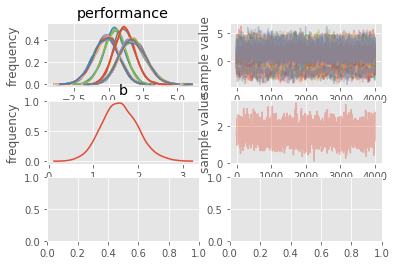

In [9]:
fig = fit.plot()